<a href="https://colab.research.google.com/github/colaresm/Machine-Learning-Projects/blob/main/Prevendo_o_pre%C3%A7o_das_a%C3%A7%C3%B5es_da_MicrosoftV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import warnings
from statsmodels.tsa.arima_model import ARIMA

# Leitura dos dados

In [99]:
path='/content/Microsoft_Stock.csv'
dataset = pd.read_csv(path)

In [100]:
ym=dataset['Close']

In [101]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [102]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M:%S')
dataset = pd.read_csv(path, parse_dates = ['Date'], index_col = 'Date', date_parser = dateparse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [103]:
y=dataset['Close']

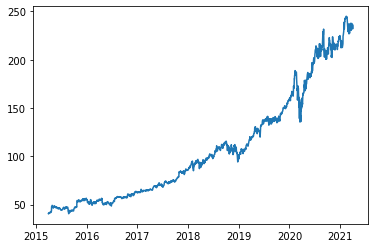

In [73]:
plt.plot(y)

# Componentes da série temporal

Uma série temporal possui 3 componentes:


*   X(t)- O valor médio da série.
*   T(t)- Tendência
*   S(t)- Sazonal(periódica)
*   N(t)- Ruído(parte aleatória)
<br>
Assim uma série temporal $X(t)$ pode ser decomposta de da seguinte forma aditiva:
$$ Y(t)= X(t)+T(t)+S(t)+N(t)$$


In [84]:
result = seasonal_decompose(y,period=31)
tendencia = result.trend
sazonal = result.seasonal
aleatorio = result.resid

Text(0.5, 1.0, 'Resíduo')

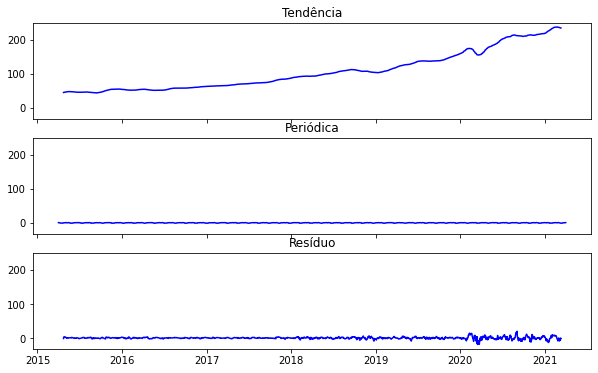

In [85]:
fig, axs = plt.subplots(3, sharex=True, sharey=True,figsize=(10,6))
#fig.suptitle('Componentes da Série')
axs[0].plot(result.trend,color='b')
axs[0].set_title("Tendência")
axs[1].plot(result.seasonal,color='b')
axs[1].set_title("Periódica")
axs[2].plot(result.resid,color='b')
axs[2].set_title("Resíduo")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Média: 0.0017974959594422059
Desvio padrão: 3.098032188563041


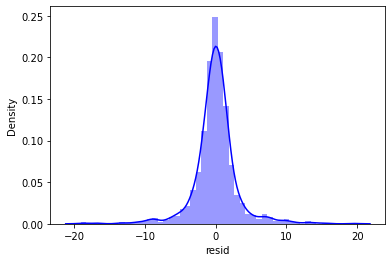

In [86]:
sns.distplot(result.resid,color='b')
print('Média:',np.mean(result.resid))
print('Desvio padrão:',np.std(result.resid))

# Médias móveis

As médias móveis são uma forma de observar tendências de forma mais clara. Aqui utilizaremos a média móvel simples.

In [87]:
def mediamovel(dados,janela):
  numbers = dados
  window_size = janela
  numbers_series = pd.Series(numbers)
  windows = numbers_series.rolling(window_size)
  moving_averages = windows.mean()
  moving_averages_list = moving_averages.tolist()
  without_nans = moving_averages_list[window_size - 1:]
  return np.round(without_nans,4)

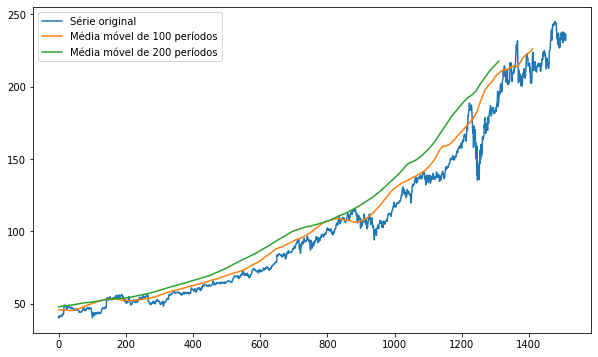

In [106]:
plt.figure(figsize=(10,6))
plt.plot(ym,label='Série original')
plt.plot(mediamovel(np.array(ym),100),label='Média móvel de 100 períodos')
plt.plot(mediamovel(np.array(ym),200),label='Média móvel de 200 períodos')
plt.legend()

# Modelo ARIMA


In [107]:
!pip install pmdarima

In [108]:
from pmdarima.arima import auto_arima

In [109]:
# Parâmetors P, Q e D
model = auto_arima(y)

In [110]:
model.order

(1, 1, 0)

In [150]:
predictions = model.predict(n_periods=14)

In [151]:
train = y[:len(y)-14]
train.shape

(1497,)

In [152]:
train.index.min(), train.index.max()

(Timestamp('2015-04-01 16:00:00'), Timestamp('2021-03-11 16:00:00'))

In [153]:
test = y[len(y)-14:]
test.shape

(14,)

In [154]:
test.index.min(), test.index.max()

(Timestamp('2021-03-12 16:00:00'), Timestamp('2021-03-31 16:00:00'))

In [155]:
model2 = auto_arima(train, suppress_warnings=True)

In [157]:
prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)

prediction.columns = ['passengers_predictions']
prediction

,passengers_predictions
Date,
2021-03-12 16:00:00,236.249551
2021-03-15 16:00:00,236.218264
2021-03-16 16:00:00,237.115458
2021-03-17 16:00:00,236.105150
2021-03-18 16:00:00,237.568767
2021-03-19 16:00:00,236.354535
2021-03-22 16:00:00,237.675600
2021-03-23 16:00:00,236.908450
2021-03-24 16:00:00,237.551570


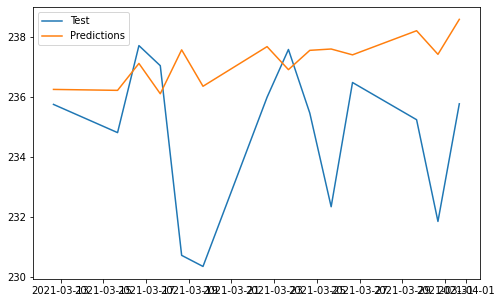

In [158]:
plt.figure(figsize=(8,5))

plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predictions')
plt.legend();